In [229]:
#Importing all required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [230]:
#Reading the data file
FundRating=pd.read_csv('Rating.csv')

/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (29,31,32,64,78,101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [231]:
FundRating.head(10)
#From below data, we can see that most of the values are numeric. We do have NAN values present in the data set
#Let's analyze it further

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,...,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30
1,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,...,1.08,15.57,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94
2,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,...,0.95,16.58,0.01,0.15,16.21,-0.01,0.01,0.14,1.33,15.94
3,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,...,0.84,16.38,0.01,0.14,14.12,-0.02,0.01,0.13,1.16,13.68
4,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,0.01,0.08,0.00,-0.02,0.01,0.12,NaN,11.53
5,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,...,1.22,8.44,0.01,0.09,10.77,0.00,0.01,0.10,0.91,11.07
6,17.94,0.0,0.78,10.04,NaN,21.07,8.53,7.44,1.64,32.55,...,0.49,7.08,0.00,0.06,3.90,-0.01,0.01,0.07,0.33,4.77
7,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,0.01,0.14,0.00,-0.02,0.01,0.13,NaN,13.68
8,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,...,0.91,-0.23,0.01,0.08,0.58,-0.01,0.01,0.16,0.19,8.08
9,1.78,0.0,0.17,5.86,7.34,1.35,8.40,63.07,3.90,15.47,...,0.90,11.14,0.01,-0.14,10.53,0.01,0.00,0.05,0.87,6.24


In [232]:
#Data pre-processing – Perform all the necessary pre-processing on the data ready to be fed to an Unsupervised algorithm 

In [233]:
FundRating.info()
#The data set has 846 rows and 19 columns, all are numeric except column 'class' which is of type object. 
#This indicates that there is categorical variable which needs to represented in numeric format.
#From below data it is evident that not all 846 rows has values, some cells are empty 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 126 entries, bb_rating to 10_years_return_category
dtypes: float64(109), int64(1), object(16)
memory usage: 24.0+ MB


In [234]:
FundRating.describe().transpose()
#Inference: From below data we can conclude that outlier values  and negetive values are present in data set.

,count,mean,std,min,25%,50%,75%,max
bb_rating,24886.0,3.473804,8.299747,0.00,0.00,0.00,2.45,80.47
us_govt_bond_rating,24886.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
below_b_rating,24886.0,0.827525,2.700019,-0.02,0.00,0.00,0.10,42.30
others_rating,24886.0,1.666769,6.885158,-68.21,0.00,0.00,0.33,100.00
maturity_bond,8093.0,7.765444,4.148558,0.00,5.46,7.29,8.92,29.30
...,...,...,...,...,...,...,...,...
10_years_alpha_category,24894.0,0.001136,0.027795,-0.11,-0.02,0.00,0.01,0.10
10_years_beta_category,24894.0,0.009076,0.005493,-0.02,0.01,0.01,0.01,0.12
10years_category_std,24894.0,0.109399,0.055202,0.00,0.06,0.12,0.15,0.34
10_years_return_mean_annual_fund,16416.0,0.858579,0.458993,-3.64,0.53,0.90,1.20,3.28


In [235]:
FundRating=FundRating.replace(",", "",regex=True)
FundRating=FundRating.replace(">", "",regex=True)
FundRating=FundRating.replace("<","",regex=True)

In [236]:
import numpy as np
FundRating["pb_ratio"]=np.where(FundRating["pb_ratio"]>(5.085), (5.085), FundRating["pb_ratio"])
FundRating["pb_ratio"]=np.where(FundRating["pb_ratio"]<(-2.155), (-2.155), FundRating["pb_ratio"])

FundRating["fund_ratio_net_annual_expense"]=np.where(FundRating["fund_ratio_net_annual_expense"]>(2.52), (2.52), FundRating["fund_ratio_net_annual_expense"])
FundRating["fund_ratio_net_annual_expense"]=np.where(FundRating["fund_ratio_net_annual_expense"]<(-0.3600), (-0.3600), FundRating["fund_ratio_net_annual_expense"])

FundRating["portfolio_cyclical_consumer_allocation"]=np.where(FundRating["portfolio_cyclical_consumer_allocation"]>(33.0), (33.0), FundRating["portfolio_cyclical_consumer_allocation"])
FundRating["portfolio_cyclical_consumer_allocation"]=np.where(FundRating["portfolio_cyclical_consumer_allocation"]<(-19.799), (-19.799), FundRating["portfolio_cyclical_consumer_allocation"])

FundRating["portfolio_utils_allocation"]=np.where(FundRating["portfolio_utils_allocation"]>(8.35), (8.35), FundRating["portfolio_utils_allocation"])
FundRating["portfolio_utils_allocation"]=np.where(FundRating["portfolio_utils_allocation"]<(-5.01), (-5.01), FundRating["portfolio_utils_allocation"])

FundRating["portfolio_property_allocation"]=np.where(FundRating["portfolio_property_allocation"]>(11.08125), (11.08125), FundRating["portfolio_property_allocation"])
FundRating["portfolio_property_allocation"]=np.where(FundRating["portfolio_property_allocation"]<(-6.6487), (-6.6487), FundRating["portfolio_property_allocation"])

FundRating["portfolio_healthcare_allocation"]=np.where(FundRating["portfolio_healthcare_allocation"]>(33.875), (33.875), FundRating["portfolio_healthcare_allocation"])
FundRating["portfolio_healthcare_allocation"]=np.where(FundRating["portfolio_healthcare_allocation"]<(-20.3250), (-20.3250), FundRating["portfolio_healthcare_allocation"])

FundRating["portfolio_consumer_defence_allocation"]=np.where(FundRating["portfolio_consumer_defence_allocation"]>(19.675), (19.675), FundRating["portfolio_consumer_defence_allocation"])
FundRating["portfolio_consumer_defence_allocation"]=np.where(FundRating["portfolio_consumer_defence_allocation"]<(-11.805), (-11.805), FundRating["portfolio_consumer_defence_allocation"])

FundRating["portfolio_energy_allocation"]=np.where(FundRating["portfolio_energy_allocation"]>(15.5562), (15.5562), FundRating["portfolio_energy_allocation"])
FundRating["portfolio_energy_allocation"]=np.where(FundRating["portfolio_energy_allocation"]<(-9.3337), (-9.3337), FundRating["portfolio_energy_allocation"])

FundRating["portfolio_materials_basic_allocation"]=np.where(FundRating["portfolio_materials_basic_allocation"]>(12.625), (12.625), FundRating["portfolio_materials_basic_allocation"])
FundRating["portfolio_materials_basic_allocation"]=np.where(FundRating["portfolio_materials_basic_allocation"]<(-7.5749), (-7.5749), FundRating["portfolio_materials_basic_allocation"])

FundRating["portfolio_tech_allocation"]=np.where(FundRating["portfolio_tech_allocation"]>(48.97499), (48.97499), FundRating["portfolio_tech_allocation"])
FundRating["portfolio_tech_allocation"]=np.where(FundRating["portfolio_tech_allocation"]<(-29.3849), (-29.3849), FundRating["portfolio_tech_allocation"])

FundRating["portfolio_industrials_allocation"]=np.where(FundRating["portfolio_industrials_allocation"]>(31.825), (31.825), FundRating["portfolio_industrials_allocation"])
FundRating["portfolio_industrials_allocation"]=np.where(FundRating["portfolio_industrials_allocation"]<(-19.095), (-19.095), FundRating["portfolio_industrials_allocation"])

FundRating["portfolio_financial_services"]=np.where(FundRating["portfolio_financial_services"]>(44.75), (44.75), FundRating["portfolio_financial_services"])
FundRating["portfolio_financial_services"]=np.where(FundRating["portfolio_financial_services"]<(-26.8499), (-26.8499), FundRating["portfolio_financial_services"])

FundRating["portfolio_communication_allocation"]=np.where(FundRating["portfolio_communication_allocation"]>(8.5), (8.5), FundRating["portfolio_communication_allocation"])
FundRating["portfolio_communication_allocation"]=np.where(FundRating["portfolio_communication_allocation"]<(-5.1), (-5.1), FundRating["portfolio_communication_allocation"])
    
FundRating["duration_bond"]=np.where(FundRating["duration_bond"]>(4.8), (4.8), FundRating["duration_bond"])
FundRating["duration_bond"]=np.where(FundRating["duration_bond"]<(4.8), (4.8), FundRating["duration_bond"])

FundRating["bbb_rating"]=np.where(FundRating["bbb_rating"]>(28.3499), (28.3499), FundRating["bbb_rating"])
FundRating["bbb_rating"]=np.where(FundRating["bbb_rating"]<(-17.009), (-17.009), FundRating["bbb_rating"])

FundRating["aa_rating"]=np.where(FundRating["aa_rating"]>(7.4750), (7.4750), FundRating["aa_rating"])
FundRating["aa_rating"]=np.where(FundRating["aa_rating"]<(-4.485), (-4.485), FundRating["aa_rating"])

FundRating["aaa_rating"]=np.where(FundRating["aaa_rating"]>(46.0500), (46.0500), FundRating["aaa_rating"])
FundRating["aaa_rating"]=np.where(FundRating["aaa_rating"]<(-27.6300), (-27.6300), FundRating["aaa_rating"])

FundRating["a_rating"]=np.where(FundRating["a_rating"]>(20.6937), (20.6937), FundRating["a_rating"])
FundRating["a_rating"]=np.where(FundRating["a_rating"]<(-12.4162), (-12.4162), FundRating["a_rating"])

FundRating["maturity_bond"]=np.where(FundRating["maturity_bond"]>(7.29), (7.29), FundRating["maturity_bond"])
FundRating["maturity_bond"]=np.where(FundRating["maturity_bond"]<(7.29), (7.29), FundRating["maturity_bond"])

FundRating["others_rating"]=np.where(FundRating["others_rating"]>(0.8), (0.8), FundRating["others_rating"])
FundRating["others_rating"]=np.where(FundRating["others_rating"]<(-0.48), (-0.48), FundRating["others_rating"])

FundRating["2013_return_fund"]=np.where(FundRating["2013_return_fund"]>(47.7037), (47.7037), FundRating["2013_return_fund"])
FundRating["2013_return_fund"]=np.where(FundRating["2013_return_fund"]<(-13.1862), (-13.1862), FundRating["2013_return_fund"])

FundRating["fund_return_3months"]=np.where(FundRating["fund_return_3months"]>(26.2000), (26.2000), FundRating["fund_return_3months"])
FundRating["fund_return_3months"]=np.where(FundRating["fund_return_3months"]<(-9.0), (-9.0), FundRating["fund_return_3months"])

FundRating["ytd_return_category"]=np.where(FundRating["ytd_return_category"]>(24.82), (24.82), FundRating["ytd_return_category"])
FundRating["ytd_return_category"]=np.where(FundRating["ytd_return_category"]<(-6.8599), (-6.8599), FundRating["ytd_return_category"])

FundRating["2017_category_return"]=np.where(FundRating["2017_category_return"]>(44.045), (44.045), FundRating["2017_category_return"])
FundRating["2017_category_return"]=np.where(FundRating["2017_category_return"]<(-16.0750), (-16.0750), FundRating["2017_category_return"])

FundRating["1_year_return_fund"]=np.where(FundRating["1_year_return_fund"]>(12.795), (12.795), FundRating["1_year_return_fund"])
FundRating["1_year_return_fund"]=np.where(FundRating["1_year_return_fund"]<(-7.7250), (-7.7250), FundRating["1_year_return_fund"])

FundRating["2015_return_fund"]=np.where(FundRating["2015_return_fund"]>(4.79), (4.79), FundRating["2015_return_fund"])
FundRating["2015_return_fund"]=np.where(FundRating["2015_return_fund"]<(-7.21), (-7.21), FundRating["2015_return_fund"])

FundRating["portfolio_convertable"]=np.where(FundRating["portfolio_convertable"]>(0.1750), (0.1750), FundRating["portfolio_convertable"])
FundRating["portfolio_convertable"]=np.where(FundRating["portfolio_convertable"]<(-0.1050), (-0.1050), FundRating["portfolio_convertable"])

FundRating["3_months_return_category"]=np.where(FundRating["3_months_return_category"]>(24.82), (24.82), FundRating["3_months_return_category"])
FundRating["3_months_return_category"]=np.where(FundRating["3_months_return_category"]<(-6.8599), (-6.8599), FundRating["3_months_return_category"])

FundRating["portfolio_others"]=np.where(FundRating["portfolio_others"]>(0.7000), (0.7000), FundRating["portfolio_others"])
FundRating["portfolio_others"]=np.where(FundRating["portfolio_others"]<(-0.4200), (-0.4200), FundRating["portfolio_others"])

FundRating["2016_return_fund"]=np.where(FundRating["2016_return_fund"]>(19.7200), (19.7200), FundRating["2016_return_fund"])
FundRating["2016_return_fund"]=np.where(FundRating["2016_return_fund"]<(-7.160), (-7.160), FundRating["2016_return_fund"])

FundRating["stock_percent_of_portfolio"]=np.where(FundRating["stock_percent_of_portfolio"]>(243.11), (243.11), FundRating["stock_percent_of_portfolio"])
FundRating["stock_percent_of_portfolio"]=np.where(FundRating["stock_percent_of_portfolio"]<(-144.95), (-144.95), FundRating["stock_percent_of_portfolio"])

FundRating["2016_return_category"]=np.where(FundRating["2016_return_category"]>(18.28), (18.28), FundRating["2016_return_category"])
FundRating["2016_return_category"]=np.where(FundRating["2016_return_category"]<(-5.7999), (-5.7999), FundRating["2016_return_category"])

FundRating["2011_return_fund"]=np.where(FundRating["2011_return_fund"]>(2.945), (2.945), FundRating["2011_return_fund"])
FundRating["2011_return_fund"]=np.where(FundRating["2011_return_fund"]<(-4.055), (-4.055), FundRating["2011_return_fund"])

FundRating["2010_return_fund"]=np.where(FundRating["2010_return_fund"]>(13.5962), (13.5962), FundRating["2010_return_fund"])
FundRating["2010_return_fund"]=np.where(FundRating["2010_return_fund"]<(12.6), (12.6), FundRating["2010_return_fund"])

FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]>(21.2299), (21.2299), FundRating["fund_return_3years"])
FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]<(-8.2099), (-8.2099), FundRating["fund_return_3years"])

FundRating["2012_fund_return"]=np.where(FundRating["2012_fund_return"]>(18.4049), (18.4049), FundRating["2012_fund_return"])
FundRating["2012_fund_return"]=np.where(FundRating["2012_fund_return"]<(8.5250), (8.5250), FundRating["2012_fund_return"])

FundRating["2018_return_fund"]=np.where(FundRating["2018_return_fund"]>(10.73), (10.73), FundRating["2018_return_fund"])
FundRating["2018_return_fund"]=np.where(FundRating["2018_return_fund"]<(-22.79), (-22.79), FundRating["2018_return_fund"])

FundRating["2017_return_fund"]=np.where(FundRating["2017_return_fund"]>(42.2237), (42.2237), FundRating["2017_return_fund"])
FundRating["2017_return_fund"]=np.where(FundRating["2017_return_fund"]<(-14.1062), (-14.1062), FundRating["2017_return_fund"])

FundRating["category_ratio_net_annual_expense"]=np.where(FundRating["category_ratio_net_annual_expense"]>(1.7349), (1.7349), FundRating["category_ratio_net_annual_expense"])
FundRating["category_ratio_net_annual_expense"]=np.where(FundRating["category_ratio_net_annual_expense"]<(0.2550), (0.2550), FundRating["category_ratio_net_annual_expense"])

FundRating["category_return_2015"]=np.where(FundRating["category_return_2015"]>(1.4950), (1.4950), FundRating["category_return_2015"])
FundRating["category_return_2015"]=np.where(FundRating["category_return_2015"]<(-5.025), (-5.025), FundRating["category_return_2015"])

FundRating["1_month_fund_return"]=np.where(FundRating["1_month_fund_return"]>(3.75), (3.75), FundRating["1_month_fund_return"])
FundRating["1_month_fund_return"]=np.where(FundRating["1_month_fund_return"]<(-1.69), (-1.69), FundRating["1_month_fund_return"])

FundRating["bond_percentage_of_porfolio"]=np.where(FundRating["bond_percentage_of_porfolio"]>(159.25), (159.25), FundRating["bond_percentage_of_porfolio"])
FundRating["bond_percentage_of_porfolio"]=np.where(FundRating["bond_percentage_of_porfolio"]<(-95.5500), (-95.5500), FundRating["bond_percentage_of_porfolio"])

FundRating["portfolio_preferred"]=np.where(FundRating["portfolio_preferred"]>(0.025), (0.025), FundRating["portfolio_preferred"])
FundRating["portfolio_preferred"]=np.where(FundRating["portfolio_preferred"]<(-0.015), (-0.015), FundRating["portfolio_preferred"])

FundRating["2010_return_category"]=np.where(FundRating["2010_return_category"]>(14.115), (14.115), FundRating["2010_return_category"])
FundRating["2010_return_category"]=np.where(FundRating["2010_return_category"]<(13.115), (13.115), FundRating["2010_return_category"])

FundRating["2013_category_return"]=np.where(FundRating["2013_category_return"]>(52.13), (52.13), FundRating["2013_category_return"])
FundRating["2013_category_return"]=np.where(FundRating["2013_category_return"]<(-19.71), (-19.71), FundRating["2013_category_return"])

FundRating["3_years_alpha_fund"]=np.where(FundRating["3_years_alpha_fund"]>(4.6599), (4.6599), FundRating["3_years_alpha_fund"])
FundRating["3_years_alpha_fund"]=np.where(FundRating["3_years_alpha_fund"]<(-5.8999), (-5.8999), FundRating["3_years_alpha_fund"])

FundRating["3years_category_std"]=np.where(FundRating["3years_category_std"]>(0.265), (0.265), FundRating["3years_category_std"])
FundRating["3years_category_std"]=np.where(FundRating["3years_category_std"]<(-0.095), (-0.095), FundRating["3years_category_std"])

FundRating["3yrs_sharpe_ratio_fund"]=np.where(FundRating["3yrs_sharpe_ratio_fund"]>(1.6849), (1.6849), FundRating["3yrs_sharpe_ratio_fund"])
FundRating["3yrs_sharpe_ratio_fund"]=np.where(FundRating["3yrs_sharpe_ratio_fund"]<(-0.2749), (-0.2749), FundRating["3yrs_sharpe_ratio_fund"])

FundRating["3yrs_treynor_ratio_category"]=np.where(FundRating["3yrs_treynor_ratio_category"]>(0.1750), (0.1750), FundRating["3yrs_treynor_ratio_category"])
FundRating["3yrs_treynor_ratio_category"]=np.where(FundRating["3yrs_treynor_ratio_category"]<(-0.0250), (-0.0250), FundRating["3yrs_treynor_ratio_category"])

FundRating["3_years_return_mean_annual_fund"]=np.where(FundRating["3_years_return_mean_annual_fund"]>(1.635), (1.635), FundRating["3_years_return_mean_annual_fund"])
FundRating["3_years_return_mean_annual_fund"]=np.where(FundRating["3_years_return_mean_annual_fund"]<(-0.405), (-0.405), FundRating["3_years_return_mean_annual_fund"])

FundRating["fund_beta_3years"]=np.where(FundRating["fund_beta_3years"]>(1.6150), (1.6150), FundRating["fund_beta_3years"])
FundRating["fund_beta_3years"]=np.where(FundRating["fund_beta_3years"]<(0.3), (0.3), FundRating["fund_beta_3years"])

FundRating["3years_fund_r_squared"]=np.where(FundRating["3years_fund_r_squared"]>(131.43), (131.43), FundRating["3years_fund_r_squared"])
FundRating["3years_fund_r_squared"]=np.where(FundRating["3years_fund_r_squared"]<(26.55), (26.55), FundRating["3years_fund_r_squared"])

FundRating["3years_fund_std"]=np.where(FundRating["3years_fund_std"]>(23.68), (23.68), FundRating["3years_fund_std"])
FundRating["3years_fund_std"]=np.where(FundRating["3years_fund_std"]<(-6.9599), (-6.9599), FundRating["3years_fund_std"])

FundRating["category_beta_3years"]=np.where(FundRating["category_beta_3years"]>(0.01), (0.01), FundRating["category_beta_3years"])
FundRating["category_beta_3years"]=np.where(FundRating["category_beta_3years"]<(0.01), (0.01), FundRating["category_beta_3years"])

FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]>(21.2299), (21.2299), FundRating["fund_return_3years"])
FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]<(-8.2099), (-8.2099), FundRating["fund_return_3years"])

FundRating["3_years_alpha_category"]=np.where(FundRating["3_years_alpha_category"]>(0.015), (0.015), FundRating["3_years_alpha_category"])
FundRating["3_years_alpha_category"]=np.where(FundRating["3_years_alpha_category"]<(-0.025), (-0.025), FundRating["3_years_alpha_category"])

FundRating["3_years_return_mean_annual_category"]=np.where(FundRating["3_years_return_mean_annual_category"]>(0.025), (0.025), FundRating["3_years_return_mean_annual_category"])
FundRating["3_years_return_mean_annual_category"]=np.where(FundRating["3_years_return_mean_annual_category"]<(-0.015), (-0.015), FundRating["3_years_return_mean_annual_category"])

FundRating["3yrs_sharpe_ratio_category"]=np.where(FundRating["3yrs_sharpe_ratio_category"]>(0.025), (0.025), FundRating["3yrs_sharpe_ratio_category"])
FundRating["3yrs_sharpe_ratio_category"]=np.where(FundRating["3yrs_sharpe_ratio_category"]<(-0.015), (-0.015), FundRating["3yrs_sharpe_ratio_category"])

FundRating["3years_category_r_squared"]=np.where(FundRating["3years_category_r_squared"]>(1.28), (1.28), FundRating["3years_category_r_squared"])
FundRating["3years_category_r_squared"]=np.where(FundRating["3years_category_r_squared"]<(0.24), (0.24), FundRating["3years_category_r_squared"])

FundRating["3_years_return_category"]=np.where(FundRating["3_years_return_category"]>(18.485), (18.485), FundRating["3_years_return_category"])
FundRating["3_years_return_category"]=np.where(FundRating["3_years_return_category"]<(-4.1149), (-4.1149), FundRating["3_years_return_category"])

FundRating["category_r_squared_5years"]=np.where(FundRating["category_r_squared_5years"]>(1.2650), (1.2650), FundRating["category_r_squared_5years"])
FundRating["category_r_squared_5years"]=np.where(FundRating["category_r_squared_5years"]<(0.265), (0.265), FundRating["category_r_squared_5years"])

FundRating["5yrs_sharpe_ratio_fund"]=np.where(FundRating["5yrs_sharpe_ratio_fund"]>(1.1549), (1.1549), FundRating["5yrs_sharpe_ratio_fund"])
FundRating["5yrs_sharpe_ratio_fund"]=np.where(FundRating["5yrs_sharpe_ratio_fund"]<(-0.08499), (-0.08499), FundRating["5yrs_sharpe_ratio_fund"])

FundRating["5years_fund_r_squared"]=np.where(FundRating["5years_fund_r_squared"]>(125.6749), (125.6749), FundRating["5years_fund_r_squared"])
FundRating["5years_fund_r_squared"]=np.where(FundRating["5years_fund_r_squared"]<(33.475), (33.475), FundRating["5years_fund_r_squared"])

FundRating["5years_fund_std"]=np.where(FundRating["5years_fund_std"]>(22.4837), (22.4837), FundRating["5years_fund_std"])
FundRating["5years_fund_std"]=np.where(FundRating["5years_fund_std"]<(-4.5662), (-4.5662), FundRating["5years_fund_std"])

FundRating["5yrs_sharpe_ratio_category"]=np.where(FundRating["5yrs_sharpe_ratio_category"]>(0.025), (0.025), FundRating["5yrs_sharpe_ratio_category"])
FundRating["5yrs_sharpe_ratio_category"]=np.where(FundRating["5yrs_sharpe_ratio_category"]<(-0.015), (-0.015), FundRating["5yrs_sharpe_ratio_category"])

FundRating["5_years_alpha_fund"]=np.where(FundRating["5_years_alpha_fund"]>(3.560), (3.560), FundRating["5_years_alpha_fund"])
FundRating["5_years_alpha_fund"]=np.where(FundRating["5_years_alpha_fund"]<(-4.84), (-4.84), FundRating["5_years_alpha_fund"])

FundRating["5_years_beta_fund"]=np.where(FundRating["5_years_beta_fund"]>(1.4150), (1.4150), FundRating["5_years_beta_fund"])
FundRating["5_years_beta_fund"]=np.where(FundRating["5_years_beta_fund"]<(0.5), (0.5), FundRating["5_years_beta_fund"])

FundRating["5_years_return_mean_annual_fund"]=np.where(FundRating["5_years_return_mean_annual_fund"]>(1.0599), (1.0599), FundRating["5_years_return_mean_annual_fund"])
FundRating["5_years_return_mean_annual_fund"]=np.where(FundRating["5_years_return_mean_annual_fund"]<(-0.2199), (-0.2199), FundRating["5_years_return_mean_annual_fund"])

FundRating["5_years_return_mean_annual_category"]=np.where(FundRating["5_years_return_mean_annual_category"]>(0.025), (0.025), FundRating["5_years_return_mean_annual_category"])
FundRating["5_years_return_mean_annual_category"]=np.where(FundRating["5_years_return_mean_annual_category"]<(-0.015), (-0.015), FundRating["5_years_return_mean_annual_category"])

FundRating["5yrs_treynor_ratio_category"]=np.where(FundRating["5yrs_treynor_ratio_category"]>(0.12), (0.12), FundRating["5yrs_treynor_ratio_category"])
FundRating["5yrs_treynor_ratio_category"]=np.where(FundRating["5yrs_treynor_ratio_category"]<(-0.0399), (-0.0399), FundRating["5yrs_treynor_ratio_category"])

FundRating["5_years_return_fund"]=np.where(FundRating["5_years_return_fund"]>(14.375), (14.375), FundRating["5_years_return_fund"])
FundRating["5_years_return_fund"]=np.where(FundRating["5_years_return_fund"]<(-6.625), (-6.625), FundRating["5_years_return_fund"])

FundRating["5_years_alpha_category"]=np.where(FundRating["5_years_alpha_category"]>(0.03), (0.03), FundRating["5_years_alpha_category"])
FundRating["5_years_alpha_category"]=np.where(FundRating["5_years_alpha_category"]<(-0.05), (-0.05), FundRating["5_years_alpha_category"])

FundRating["5_years_beta_category"]=np.where(FundRating["5_years_beta_category"]>(0.01), (0.01), FundRating["5_years_beta_category"])
FundRating["5_years_beta_category"]=np.where(FundRating["5_years_beta_category"]<(0.01), (0.01), FundRating["5_years_beta_category"])

FundRating["5years_category_std"]=np.where(FundRating["5years_category_std"]>(0.25), (0.25), FundRating["5years_category_std"])
FundRating["5years_category_std"]=np.where(FundRating["5years_category_std"]<(-0.0699), (-0.0699), FundRating["5years_category_std"])

FundRating["10years_fund_r_squared"]=np.where(FundRating["10years_fund_r_squared"]>(105.2350), (105.2350), FundRating["10years_fund_r_squared"])
FundRating["10years_fund_r_squared"]=np.where(FundRating["10years_fund_r_squared"]<(66), (66), FundRating["10years_fund_r_squared"])

FundRating["10yrs_sharpe_ratio_fund"]=np.where(FundRating["10yrs_sharpe_ratio_fund"]>(1.225), (1.225), FundRating["10yrs_sharpe_ratio_fund"])
FundRating["10yrs_sharpe_ratio_fund"]=np.where(FundRating["10yrs_sharpe_ratio_fund"]<(0.7050), (0.7050), FundRating["10yrs_sharpe_ratio_fund"])

FundRating["10_years_alpha_fund"]=np.where(FundRating["10_years_alpha_fund"]>(2.085), (2.085), FundRating["10_years_alpha_fund"])
FundRating["10_years_alpha_fund"]=np.where(FundRating["10_years_alpha_fund"]<(-2.675), (-2.675), FundRating["10_years_alpha_fund"])

FundRating["10years_fund_std"]=np.where(FundRating["10years_fund_std"]>(20.6299), (20.6299), FundRating["10years_fund_std"])
FundRating["10years_fund_std"]=np.where(FundRating["10years_fund_std"]<(3.2), (3.2), FundRating["10years_fund_std"])

FundRating["10yrs_sharpe_ratio_category"]=np.where(FundRating["10yrs_sharpe_ratio_category"]>(0.01), (0.01), FundRating["10yrs_sharpe_ratio_category"])
FundRating["10yrs_sharpe_ratio_category"]=np.where(FundRating["10yrs_sharpe_ratio_category"]<(0.01), (0.01), FundRating["10yrs_sharpe_ratio_category"])

FundRating["10_years_beta_fund"]=np.where(FundRating["10_years_beta_fund"]>(1.210), (1.210), FundRating["10_years_beta_fund"])
FundRating["10_years_beta_fund"]=np.where(FundRating["10_years_beta_fund"]<(0.8099), (0.8099), FundRating["10_years_beta_fund"])

FundRating["10_years_return_mean_annual_category"]=np.where(FundRating["10_years_return_mean_annual_category"]>(0.01), (0.01), FundRating["10_years_return_mean_annual_category"])
FundRating["10_years_return_mean_annual_category"]=np.where(FundRating["10_years_return_mean_annual_category"]<(0.01), (0.01), FundRating["10_years_return_mean_annual_category"])

FundRating["10yrs_treynor_ratio_category"]=np.where(FundRating["10yrs_treynor_ratio_category"]>(0.2450), (0.2450), FundRating["10yrs_treynor_ratio_category"])
FundRating["10yrs_treynor_ratio_category"]=np.where(FundRating["10yrs_treynor_ratio_category"]<(-0.035), (-0.035), FundRating["10yrs_treynor_ratio_category"])

FundRating["10_years_return_fund"]=np.where(FundRating["10_years_return_fund"]>(30.9), (30.9), FundRating["10_years_return_fund"])
FundRating["10_years_return_fund"]=np.where(FundRating["10_years_return_fund"]<(-18.54), (-18.54), FundRating["10_years_return_fund"])

FundRating["10_years_alpha_category"]=np.where(FundRating["10_years_alpha_category"]>(0.055), (0.055), FundRating["10_years_alpha_category"])
FundRating["10_years_alpha_category"]=np.where(FundRating["10_years_alpha_category"]<(-0.065), (-0.065), FundRating["10_years_alpha_category"])


FundRating["10_years_beta_category"]=np.where(FundRating["10_years_beta_category"]>(0.01), (0.01), FundRating["10_years_beta_category"])
FundRating["10_years_beta_category"]=np.where(FundRating["10_years_beta_category"]<(0.01), (0.01), FundRating["10_years_beta_category"])

FundRating["10years_category_std"]=np.where(FundRating["10years_category_std"]>(0.2850), (0.2850), FundRating["10years_category_std"])
FundRating["10years_category_std"]=np.where(FundRating["10years_category_std"]<(-0.0750), (-0.0750), FundRating["10years_category_std"])

FundRating["10_years_return_mean_annual_fund"]=np.where(FundRating["10_years_return_mean_annual_fund"]>(1.5250), (1.5250), FundRating["10_years_return_mean_annual_fund"])
FundRating["10_years_return_mean_annual_fund"]=np.where(FundRating["10_years_return_mean_annual_fund"]<(0.29), (0.29), FundRating["10_years_return_mean_annual_fund"])

FundRating["10_years_return_category"]=np.where(FundRating["10_years_return_category"]>(25.6399), (25.6399), FundRating["10_years_return_category"])
FundRating["10_years_return_category"]=np.where(FundRating["10_years_return_category"]<(-5.0799), (-5.0799), FundRating["10_years_return_category"])

FundRating["fund_return_3years.1"]=np.where(FundRating["fund_return_3years.1"]>(21.2299), (21.2299), FundRating["fund_return_3years.1"])
FundRating["fund_return_3years.1"]=np.where(FundRating["fund_return_3years.1"]<(-8.2099), (-8.2099), FundRating["fund_return_3years.1"])

FundRating["10years_category_r_squared"]=np.where(FundRating["10years_category_r_squared"]>(1.235), (1.235), FundRating["10years_category_r_squared"])
FundRating["10years_category_r_squared"]=np.where(FundRating["10years_category_r_squared"]<(0.4), (0.4), FundRating["10years_category_r_squared"])

FundRating["category_return_1month"]=np.where(FundRating["category_return_1month"]>(2.76), (2.76), FundRating["category_return_1month"])
FundRating["category_return_1month"]=np.where(FundRating["category_return_1month"]<(-0.9199), (-0.9199), FundRating["category_return_1month"])

FundRating["2014_return_fund"]=np.where(FundRating["2014_return_fund"]>(12.645), (12.645), FundRating["2014_return_fund"])
FundRating["2014_return_fund"]=np.where(FundRating["2014_return_fund"]<(-2.275), (-2.275), FundRating["2014_return_fund"])

FundRating["years_down"]=np.where(FundRating["years_down"]>(7.0), (7.0), FundRating["years_down"])
FundRating["years_down"]=np.where(FundRating["years_down"]<(-1.0), (-1.0), FundRating["years_down"])


FundRating["ytd_return_fund"]=np.where(FundRating["ytd_return_fund"]>(25.93), (25.93), FundRating["ytd_return_fund"])
FundRating["ytd_return_fund"]=np.where(FundRating["ytd_return_fund"]<(-8.39), (-8.39), FundRating["ytd_return_fund"])

FundRating["2011_return_category"]=np.where(FundRating["2011_return_category"]>(1.815), (1.815), FundRating["2011_return_category"])
FundRating["2011_return_category"]=np.where(FundRating["2011_return_category"]<(-5.025), (-5.025), FundRating["2011_return_category"])

FundRating["cash_percent_of_portfolio"]=np.where(FundRating["cash_percent_of_portfolio"]>(15.715), (15.715), FundRating["cash_percent_of_portfolio"])
FundRating["cash_percent_of_portfolio"]=np.where(FundRating["cash_percent_of_portfolio"]<(-7.445), (-7.445), FundRating["cash_percent_of_portfolio"])

FundRating["category_return_1year"]=np.where(FundRating["category_return_1year"]>(10.3099), (10.3099),FundRating["category_return_1year"])
FundRating["category_return_1year"]=np.where(FundRating["category_return_1year"]<(-5.1299), (-5.1299),FundRating["category_return_1year"])

FundRating["2018_return_category"]=np.where(FundRating["2018_return_category"]>(8.0950),(8.0950), FundRating["2018_return_category"])
FundRating["2018_return_category"]=np.where(FundRating["2018_return_category"]<(-19.0650),(-19.0650),FundRating["2018_return_category"])

FundRating["years_up"]=np.where(FundRating["years_up"]>(25.5), (25.5), FundRating["years_up"])
FundRating["years_up"]=np.where(FundRating["years_up"]<(-10.5), (-10.5), FundRating["years_up"])


FundRating["2012_return_category"]=np.where(FundRating["2012_return_category"]>(17.8550), (17.8550), FundRating["2012_return_category"])
FundRating["2012_return_category"]=np.where(FundRating["2012_return_category"]<(10.13), (10.14), FundRating["2012_return_category"])

FundRating["bb_rating"]=np.where(FundRating["bb_rating"]>(2.42), (6.05), FundRating["bb_rating"])
FundRating["bb_rating"]=np.where(FundRating["bb_rating"]<(-3.63), (-3.63), FundRating["bb_rating"])

FundRating["below_b_rating"]=np.where(FundRating["below_b_rating"]>(0.25),(0.25),FundRating["below_b_rating"])
FundRating["below_b_rating"]=np.where(FundRating["below_b_rating"]<(-0.1500), (-0.1500), FundRating["below_b_rating"])

FundRating["2014_category_return"]=np.where(FundRating["2014_category_return"]>(12.7399),(12.7399),FundRating["2014_category_return"])
FundRating["2014_category_return"]=np.where(FundRating["2014_category_return"]< (-3.1799), (-3.1799), FundRating["2014_category_return"])

FundRating["total_assets"]=np.where(FundRating["total_assets"]>(3908895000.0),(3908895000.0),FundRating["total_assets"])
FundRating["total_assets"]=np.where(FundRating["total_assets"]<(-2194825000.0), (-2194825000.0), FundRating["total_assets"])

FundRating["return_ytd"]=np.where(FundRating["return_ytd"]>(25.93),(25.93),FundRating['return_ytd'])
FundRating["return_ytd"]=np.where(FundRating["return_ytd"]<(-8.39),(-8.39), FundRating['return_ytd'])

FundRating["yield"]=np.where(FundRating["yield"]>(5.8800),(5.8800),FundRating['yield'])
FundRating["yield"]=np.where(FundRating["yield"]<(-2.7600),(-2.7600), FundRating['yield'])

In [237]:
# Checking the presence of missing values.
FundRating.isnull().values.any(),FundRating.isnull().sum()

(True, bb_rating                             114
 us_govt_bond_rating                   114
 below_b_rating                        114
 others_rating                         114
 maturity_bond                       16907
                                     ...  
 10_years_alpha_category               106
 10_years_beta_category                106
 10years_category_std                  106
 10_years_return_mean_annual_fund     8584
 10_years_return_category              115
 Length: 126, dtype: int64)

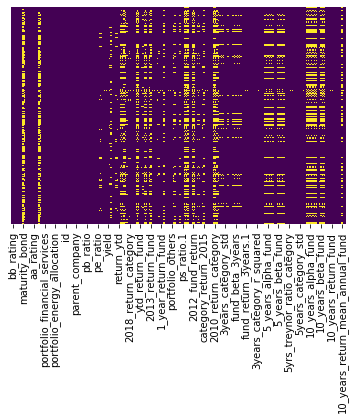

In [238]:
#Let's reconfirm the understanding with heatmap
sns.heatmap(FundRating.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#From below graph, it is evident that values are missing (indicated by yellow bar)

In [239]:
#Labelling the variable based on size of the vehicle
cleanup_nums = { "greatstone_rating": {0:"zero", 1:"one" , 2:"two", 3:"three", 4: "four", 5:"five" }
                
               }
#Replacing in the data set
FundRating.replace(cleanup_nums, inplace=True)

In [240]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, FundRating, y=None):

        self.fill = pd.Series([FundRating[c].value_counts().index[0]
            if FundRating[c].dtype == np.dtype('O') else FundRating[c].median() for c in FundRating],
            index=FundRating.columns)

        return self

    def transform(self, FundRating, y=None):
        return FundRating.fillna(self.fill)
    
    
    #X = pd.DataFrame(data)
#xt = DataFrameImputer().fit_transform(FundRating)

In [241]:
FundRating = DataFrameImputer().fit_transform(FundRating)

In [242]:
FundRating.isnull().values.any(), FundRating.isna().values.any(), FundRating.columns[FundRating.isnull().any()]

(False, False, Index([], dtype='object'))

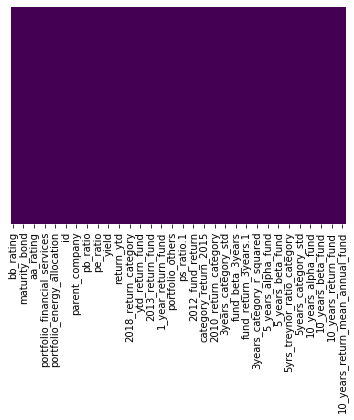

In [243]:
#Let's reconfirm the understanding with heatmap
sns.heatmap(FundRating.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [244]:
FundRating1=FundRating
FundRating=FundRating.drop(['greatstone_rating','fund_size','investment_class','mmc','pc_ratio','pe_ratio','ps_ratio.1','return_ytd','10yrs_treynor_ratio_fund','5yrs_treynor_ratio_fund','3yrs_treynor_ratio_fund','ps_ratio','inception_date','fund_id','category','fund_name','currency','parent_company'],axis=1)
#FundRating=FundRating.replace(",", "")
FundRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 108 entries, bb_rating to 10_years_return_category
dtypes: float64(107), int64(1)
memory usage: 20.6 MB


In [245]:
#Labelling the variable based on size of the vehicle
cleanup_nums = { "investment_class": {"Blend":1, "Growth":2 ,"Value":3 },
                
                 "fund_size":  {"Small": 1, "Medium": 2 ,"Large":3 }
                
                #"greatstone_rating": {"zero":0, "one":1 , "two":2, "three":3, "four":4, "five":5 }
               }
#Replacing in the data set
FundRating.replace(cleanup_nums, inplace=True)

#FundRating['class'].unique()
#Inference: Labelling and replacement is reflecting successfully

In [246]:
def replace_outlier(FundRating_in, col_name):
    q1 = FundRating_in[col_name].quantile(0.25)
    q3 = FundRating_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    FundRating_in[col_name]=np.where((FundRating_in[col_name] < fence_low), FundRating_in[col_name].quantile(0.25), FundRating_in[col_name])
    FundRating_in[col_name]=np.where((FundRating_in[col_name] > fence_high), FundRating_in[col_name].quantile(0.75), FundRating_in[col_name])
    #     FundRating_in[col_name]=np.where(FundRating_in.loc[FundRating_in[col_name] > fence_high], FundRating_in[col_name].median(),FundRating_in[col_name])
    #median=FundRating[col_name].median()
    #FundRating_in[col_name] = np.where((FundRating_in[col_name] > fence_high) | (FundRating_in[col_name] < fence_low), median, FundRating_in[col_name])
    return FundRating_in
    
df_columns = FundRating.columns
for i in range(df_columns.size):
    print(df_columns[i])
    FundRating=replace_outlier(FundRating, df_columns[i])

bb_rating
us_govt_bond_rating
below_b_rating
others_rating
maturity_bond
b_rating
a_rating
aaa_rating
aa_rating
bbb_rating
duration_bond
portfolio_communication_allocation
portfolio_financial_services
portfolio_industrials_allocation
portfolio_tech_allocation
portfolio_materials_basic_allocation
portfolio_energy_allocation
portfolio_consumer_defence_allocation
portfolio_healthcare_allocation
portfolio_property_allocation
id
portfolio_utils_allocation
portfolio_cyclical_consumer_allocation
fund_ratio_net_annual_expense
pb_ratio
total_assets
yield
2014_category_return
2012_return_category
years_up
2018_return_category
category_return_1year
cash_percent_of_portfolio
2011_return_category
ytd_return_fund
years_down
2014_return_fund
category_return_1month
2013_return_fund
fund_return_3months
ytd_return_category
2017_category_return
1_year_return_fund
2015_return_fund
portfolio_convertable
3_months_return_category
portfolio_others
2016_return_fund
stock_percent_of_portfolio
2016_return_catego

In [247]:
cleanup_nums = {
                "greatstone_rating": {"zero":0, "one":1 , "two":2, "three":3, "four":4, "five":5 }
               }
#Replacing in the data set
FundRating1.replace(cleanup_nums, inplace=True)

In [248]:
# from sklearn.impute import KNNImputer
#  #nan = np.nan
# #>>> X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
# imputer = KNNImputer(n_neighbors=2, weights="uniform")
# imputer.fit_transform(FundRating)

In [249]:
#Split the data into train and test 
#(Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [250]:
#Split the data into train and test 
#(Suggestion: specify “random state” if you are using train_test_split from Sklearn)

#Importing required libaries
from sklearn.model_selection import train_test_split
import os

#Drop the target 'class' from data
#x=FundRating.drop('greatstone_rating',axis=1)
x=FundRating
y=FundRating1['greatstone_rating']
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=0)
x_train,x_test
y_train,y_test

(15705    4
 6016     3
 24764    1
 11962    2
 15824    2
         ..
 13123    4
 19648    0
 9845     3
 10799    2
 2732     3
 Name: greatstone_rating, Length: 17500, dtype: int64, 14149    5
 8946     5
 22378    3
 12162    3
 4879     4
         ..
 3639     3
 3338     2
 10927    3
 23669    3
 6492     2
 Name: greatstone_rating, Length: 7500, dtype: int64)

In [251]:
#Do data Scaling/Normalization if required
#This is needed we have variables in different scale ex: scaled_variance.1 etc
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [252]:
#Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [253]:
# # generating the covariance matrix and the eigen values for the PCA analysis
# cov_matrix = np.cov(x_train.T) # the relevanat covariance matrix
# print('Covariance Matrix \n%s', cov_matrix)

# #generating the eigen values and the eigen vectors
# e_vals, e_vecs = np.linalg.eig(cov_matrix)
# print('Eigenvectors \n%s' %e_vecs)

In [254]:
# print('\nEigenvalues \n%s' %e_vals)

In [255]:
# # "cumulative variance explained" analysis 
# tot = sum(e_vals)
# var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)
# print("Cumulative Variance Explained", cum_var_exp)

In [256]:
# # Plotting the variance expalained by the principal components and the cumulative variance explained.
# plt.figure(figsize=(10 , 5))
# plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
# plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
# plt.ylabel('Explained Variance Ratio')
# plt.xlabel('Principal Components')
# plt.legend(loc = 'best')
# plt.tight_layout()
# plt.show()

# #Inference: From below graph we can learn that ~95% data variance can be captured 
# #when we take only ~ 60 variables from the original data set

In [257]:
# #Proceeding with 6 components
# pca_new = PCA(n_components=95)
# #Fitting PCA into train data
# pca_new.fit(x_train)
# #Fitting PCA into test data
# pca_new.fit(x_test)
# print(pca_new.components_)
# print(pca_new.explained_variance_ratio_)
# Xpca_train_new = pca_new.transform(x_train)
# Xpca_test_new = pca_new.transform(x_test)


In [258]:
# print("original shape:   ", x_test.shape)
# print("transformed shape:", Xpca_test_new.shape)
# #Inference: From below data it is evident that dimension of the data set is reduced from 18 to 6 
# #(excluding target variable-class)

In [259]:
#Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. 
#And the accuracy score should be on the same rows of test data that were used earlier.

In [260]:
#Before PCA-RFC
from sklearn.ensemble import RandomForestClassifier
# param_dist = {"n_estimators":[55],
#               "max_depth":[None],
#               "max_features": sp_randint(40,45),
#               "min_samples_split": [16],
#               "min_samples_leaf": [5],
#               "bootstrap": [True, False],
#               "criterion": [ "entropy"]}
#rfcl = RandomForestClassifier(n_estimators=55)
rfcl = RandomForestClassifier(n_estimators=55,max_depth=None,max_features=44,min_samples_split=16,min_samples_leaf=5,bootstrap= False,criterion='entropy')
#rfcl = RandomForestClassifier('bootstrap': False,'criterion':'entropy','max_depth': None,'max_features': 44,'min_samples_leaf': 5,'min_samples_split':16,'n_estimators':55)
rfcl = rfcl.fit(x_train, y_train)
rfcl.score(x_train, y_train), rfcl.score(x_test, y_test)

(0.9552571428571428, 0.6476)

In [228]:

greatstone_rating=rfcl.predict(x)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [225]:
greatstone_rating

In [217]:
greatstone_rating = pd.DataFrame(greatstone_rating, columns=['greatstone_rating']).to_csv('sample_submissionRFCL3.csv')

In [162]:
#After PCA-RFC
rfcl.fit(Xpca_train_new, y_train)
rfcl.score(Xpca_train_new, y_train), rfcl.score(Xpca_test_new, y_test)

(0.9845714285714285, 0.6222666666666666)

In [48]:
rfcl.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 48,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


In [51]:
param_dist = {"n_estimators":[55],
              "max_depth":[None],
              "max_features": sp_randint(40,45),
              "min_samples_split": [16],
              "min_samples_leaf": [5],
              "bootstrap": [True, False],
              "criterion": [ "entropy"]}

In [52]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(rfcl, param_distributions=param_dist, n_iter=samples,verbose=10) #default cv = 3

In [53]:
randomCV.fit(x_train, y_train)
 
print(randomCV.best_params_)

/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=41, min_samples_leaf=5, min_samples_split=16, n_estimators=55 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=41, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.666, total=  18.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=41, min_samples_leaf=5, min_samples_split=16, n_estimators=55 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.9s remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=41, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.674, total=  19.0s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=41, min_samples_leaf=5, min_samples_split=16, n_estimators=55 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.0s remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=41, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.664, total=  19.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=5, min_samples_split=16, n_estimators=55 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.1s remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.662, total=  12.0s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=5, min_samples_split=16, n_estimators=55 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.656, total=  11.9s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=5, min_samples_split=16, n_estimators=55 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.652, total=  12.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=5, min_samples_split=16, n_estimators=55 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.663, total=  12.5s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=5, min_samples_split=16, n_estimators=55 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.8min remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.659, total=  12.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=5, min_samples_split=16, n_estimators=55 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.0min remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.650, total=  12.6s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=44, min_samples_leaf=5, min_samples_split=16, n_estimators=55 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.2min remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=44, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.668, total=  20.3s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=44, min_samples_leaf=5, min_samples_split=16, n_estimators=55 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=44, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.674, total=  20.5s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=44, min_samples_leaf=5, min_samples_split=16, n_estimators=55 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=44, min_samples_leaf=5, min_samples_split=16, n_estimators=55, score=0.665, total=  20.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=43, min_samples_leaf=5, min_samples_split=16, n_estimators=55 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=43, min_samples_leaf=5, min_samples_split=16, n_e

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.6min finished


{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 44, 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 55}


In [54]:
print(" Best cross-validation accuracy: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format( randomCV.score( x_test, y_test)))

 Best cross-validation accuracy: 0.67
 Best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 44, 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 55}
 Test set accuracy: 0.64


In [158]:
print(" Best cross-validation accuracy: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format( randomCV.score( x_test, y_test)))

 Best cross-validation accuracy: 0.52
 Best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 41, 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 68}
 Test set accuracy: 0.47


In [145]:
print(" Best cross-validation accuracy: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format( randomCV.score( x_test, y_test)))

 Best cross-validation accuracy: 0.67
 Best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 43, 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 55}
 Test set accuracy: 0.64


In [141]:
print(" Best cross-validation accuracy: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format( randomCV.score( x_test, y_test)))

 Best cross-validation accuracy: 0.66
 Best parameters:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 46, 'min_samples_leaf': 3, 'min_samples_split': 17, 'n_estimators': 70}
 Test set accuracy: 0.63


In [137]:
print(" Best cross-validation accuracy: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format( randomCV.score( x_test, y_test)))

 Best cross-validation accuracy: 0.66
 Best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 43, 'min_samples_leaf': 9, 'min_samples_split': 27, 'n_estimators': 40}
 Test set accuracy: 0.63


In [128]:
print(" Best cross-validation accuracy: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format( randomCV.score( x_test, y_test)))

 Best cross-validation accuracy: 0.67
 Best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 55}
 Test set accuracy: 0.64


In [117]:
# from sklearn.model_selection import GridSearchCV
# #pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 
# pipe_svc = Pipeline([('scl', StandardScaler()),('rfcl', RandomForestClassifier())]) 
# #param_grid = {'pca__n_components':[65],'svc__C': [0.001, 0.01, 0.1, 1,5,6,7,8,9,10], 'svc__gamma': [0.001,0.01,0.06,0.5,0.1,1,2,3,4,10], 'svc__kernel':['rbf','poly']} 

# param_grid = {'svc__C': [5,10,14], 'svc__gamma': [0.05,0.06,0.07,], 'svc__kernel':['rbf']} 

# grid = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 5,verbose=10) 

# grid.fit( x_train, y_train) 

# print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
# print(" Best parameters: ", grid.best_params_) 
# print(" Test set accuracy: {:.2f}". format( grid.score( x_cv, y_cv)))

In [129]:
greatstone_rating = rfcl.predict(x_test)

In [130]:
print (greatstone_rating)

[5 5 4 ... 3 3 2]


In [131]:
greatstone_rating = pd.DataFrame(greatstone_rating, columns=['greatstone_rating']).to_csv('sample_submissionRFCL.csv')